# Exploring the Significant Batting Statistics of Hall of Fame Baseball Players


<i>Patrick Marino
<br>October 2, 2016</i>

<b>Introduction</b>

The National Baseball Hall of Fame is an independent, non-profit institution dedicated to the history of the game of baseball.  Besides being a general repository for baseball history, the Hall also enshrines players who've had exceptional careers or have otherwise significantly impacted the game.

Hall of Fame players are selected through a subjective process (voting).  In considering the career of a prospective player, voters must differentiate the career of that player from other players eligible for induction.  Statistical summaries of a player's career can be a starting point for these comparisons.

Since there are no given stastical rules to determine hall of fame induction, each individual voter may consider different statistical factors.  Through an analysis of the statistics of available player statistics, it's possible to determine the statistical categories most likely to influence a voter's decision to choose one player over another.

This document explores the batting statistics that may play the greatest role in determining whether or not a player will be voted into the hall of fame.

<i>Baseball Hall of Fame - http://baseballhall.org/<i>



<b> The Data</b>

Statistics for this analysis are provided by <i>Lahman's Baseball Database</i>, containing pitching, hitting and fielding statistics from 1817 to 2015.  

<i>source - http://www.seanlahman.com/baseball-archive/statistics/</i>

This analysis utilized the 2015 version of the database, last updated on March 2, 2016

<b>Questions Considered by the Analysis</b>

Which are the most significant batting statistics that determine whether or not a player is voted into the Hall of Fame?  How have these statistics changed over time?

The analysis aims to compare:
<li>players who have been inducted versus the general population of eligible players
<li>comparison over different eras

<b>Hypotheses</b>

The <i>Batting Title</i> award each year goes to the player who has the highest <b>Batting Average</b>, so it is hypothesized that is likely to be a significant factor, if not <i>the</i> most significant statistic.  It is also expected that <b>Home Runs</b> will be a very significant factor, based on the significance of being a leader in that realm throughout history.  It is also expected that the correlations may vary over time based on a number of factors, including but not limited to changes in the ball or bat, changes in the tactics employed by managers, or perceptions of voters based on charatcer or social issues.




<b>Conclusions</b>

While all analyzed batting statistics are positively correlated with Hall of Fame selection, the categories with the strongest correlation are <b>Runs, RBI, </b>and <b>Hits</b>.  <b>Batting Average</b> and <b>Home Runs</b> were actually among the batting categories with the weakest correlation to Hall of Fame selection.  There is a demonstrable fluctuation for some statistical categories and their correlation with Hall of Fame selection based on the era in which players played.

<hr>
<hr>
<hr>

## Data Analysis Process Documentation

### Data Wrangling and Exploration

In [1]:
# import relevant packages and functions

import csv
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [2]:
# loading data from relevant csv files, creating dataframes for analysis

hall = pd.read_csv('HallOfFame.csv')
batting = pd.read_csv('Batting.csv')
pitching = pd.read_csv('Pitching.csv')
master = pd.read_csv('Master.csv')

For the purposes of this analysis, the most relevant dataframes will be 'hall' and 'batting.'  The following code will explore these dataframes and identify any issues that may make analysis more difficult.  Next, the data will be modified for analysis.

<hr>

### Hall of Fame Table

<i>Creating a Dataframe of Hall of Fame inductees</i>

In [3]:
# view the hall dataframe for potential issues

hall.head(n=10)

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN
5,lajoina01,1936,BBWAA,226.0,170.0,146.0,N,Player,NaN
6,speaktr01,1936,BBWAA,226.0,170.0,133.0,N,Player,NaN
7,youngcy01,1936,BBWAA,226.0,170.0,111.0,N,Player,NaN
8,hornsro01,1936,BBWAA,226.0,170.0,105.0,N,Player,NaN
9,cochrmi01,1936,BBWAA,226.0,170.0,80.0,N,Player,NaN


In [4]:
# check to see what values can be in the 'categories' column

hall['category'].unique()

array(['Player', 'Manager', 'Pioneer/Executive', 'Umpire'], dtype=object)

For this analysis, only players are relevant, since the analysis is of batting statistics.

In [5]:
# creates a variable to store the data for players from the larger hall table

hall_players = hall.loc[hall['category'] == 'Player']

In [6]:
# check to make sure only players remain

hall_players['category'].unique()

array(['Player'], dtype=object)

In [7]:
# only store the data for players who have been inducted into the hall of fame

hall_players = hall_players.loc[hall_players['inducted'] == 'Y']

In [8]:
# check to make sure only inducted players remain

hall_players['inducted'].unique()

array(['Y'], dtype=object)

In [9]:
len(hall_players.index)

247

According to the Hall of Fame website, there are 252 players in the hall of fame, currently.  While there is a discrepancy, it's possible that the data being evaluated isn't entirely current.  The analysis will be revisited if there is a future issue.

<b>hall_players</b> - data for players inducted into the hall of fame

<hr>

### Batting Table

To simplify the analysis, focus will be on a few categories for each player:
<li>Games appeared in
<li>At Bats
<li>Runs Scored
<li>Hits
<li>Home Runs
<li>Runs Batted In (RBI)
<li>Stolen Bases
<li>Base on Balls (sometimes referred to as walks)

In [10]:
# create a new variable that stores the select statistics

batting_select = batting[['playerID', 'yearID', 'G', 'AB', 'H', 'R', 'HR', 'RBI', 'SB', 'BB']]

In [11]:
# check results and look for potential issues

batting_select.head()

,playerID,yearID,G,AB,H,R,HR,RBI,SB,BB
0,abercda01,1871,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,addybo01,1871,25,118.0,32.0,30.0,0.0,13.0,8.0,4.0
2,allisar01,1871,29,137.0,40.0,28.0,0.0,19.0,3.0,2.0
3,allisdo01,1871,27,133.0,44.0,28.0,2.0,27.0,1.0,0.0
4,ansonca01,1871,25,120.0,39.0,29.0,0.0,16.0,6.0,2.0


<b>Career Stats</b>

HOF determination is based on a player's total achievement, and not simply the achievement of a single year.  The current batting_select dataframe has a single row dedicated to one year's batting statistics.  The next code will create a new dataframe with career statistics.

In [12]:
# create a dictionary that the next code can reference, values for each column
# yearID will be handled differently so that the yearID's aren't totaled, and are instead
# combined into a list representing the years played by an individual player

column_values = {'yearID':[lambda x: list(x)], 'G':['sum'], 'AB':['sum'], 'H':['sum'], 'R':['sum'], 
                 'HR':['sum'], 'RBI':['sum'], 'SB':['sum'], 'BB':['sum']}

# soucre - https://discussions.udacity.com/t/sum-agg-at-same-time/190909/2

In [13]:
career_batting_select = batting_select.groupby('playerID').agg(column_values).reset_index()

In [14]:
# check for success

career_batting_select.head(n=3)

,playerID,yearID,AB,BB,RBI,G,SB,HR,H,R
,,<lambda>,sum,sum,sum,sum,sum,sum,sum,sum
0,aardsda01,"[2004, 2006, 2007, 2008, 2009, 2010, 2012, 201...",4.0,0.0,0.0,331,0.0,0.0,0.0,0.0
1,aaronha01,"[1954, 1955, 1956, 1957, 1958, 1959, 1960, 196...",12364.0,1402.0,2297.0,3298,240.0,755.0,3771.0,2174.0
2,aaronto01,"[1962, 1963, 1965, 1968, 1969, 1970, 1971]",944.0,86.0,94.0,437,9.0,13.0,216.0,102.0


In [15]:
# remove subheadings of columns by renaming columns

career_batting_select.columns = ['playerID', 'yearID', 'AB', 'BB', 'RBI', 'G', 'SB', 'HR', 'H', 'R']

In [16]:
career_batting_select.head(n=1)

,playerID,yearID,AB,BB,RBI,G,SB,HR,H,R
0,aardsda01,"[2004, 2006, 2007, 2008, 2009, 2010, 2012, 201...",4.0,0.0,0.0,331,0.0,0.0,0.0,0.0


In [17]:
# reorder columns

career_batting_select = career_batting_select[['playerID', 'yearID', 'G', 'AB', 'H', 'R', 'HR', 'RBI', 'SB', 'BB']]

In [18]:
career_batting_select.head(n=1)

,playerID,yearID,G,AB,H,R,HR,RBI,SB,BB
0,aardsda01,"[2004, 2006, 2007, 2008, 2009, 2010, 2012, 201...",331,4.0,0.0,0.0,0.0,0.0,0.0,0.0


<i>Career Years</i>

A useful statistic could be years played, so adding a column for years played makes sense not only as a statistic for comparison, but also later for eligibility.

In [19]:
# create a new column for the dataframe that counts the number of years
# source - http://stackoverflow.com/questions/39730951/trying-to-return-number-of-items-in-a-list-as-a-column-in-a-dataframe/39731042#39731042

career_batting_select['Y'] = pd.Series((career_batting_select['yearID'].apply(len)), index = career_batting_select.index)

In [20]:
# check for success

career_batting_select.head(n=1)

,playerID,yearID,G,AB,H,R,HR,RBI,SB,BB,Y
0,aardsda01,"[2004, 2006, 2007, 2008, 2009, 2010, 2012, 201...",331,4.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [21]:
# reorder columns

career_batting_select = career_batting_select[['playerID', 'yearID', 'Y', 'G', 'AB', 'H', 'R', 'HR', 'RBI', 'SB', 'BB']]

In [22]:
# check for success

career_batting_select.head(n=1)

,playerID,yearID,Y,G,AB,H,R,HR,RBI,SB,BB
0,aardsda01,"[2004, 2006, 2007, 2008, 2009, 2010, 2012, 201...",9,331,4.0,0.0,0.0,0.0,0.0,0.0,0.0


<i>Batting Average</i>

One of the more heavily reported statistics in baseball is <i>Batting Average</i>.  The annual winner of the <i>Batting Title</i> is the player with the highest batting average.  Batting average is calculated by dividing the number of <b>hits</b> by the number of <b>at-bats</b>.

<i>source - https://en.wikipedia.org/wiki/Batting_average#Major_League_Baseball</i>

In [23]:
# define a function that can be used in any table of batting statics that adds a column for batting average (BA)

def add_batting_average(batting_table):
    batting_average_series = batting_table['H'] / batting_table['AB']
    batting_table['BA'] = pd.Series(batting_average_series.round(3), index = batting_table.index)

In [24]:
#apply batting average to the career batting table in this analysis

add_batting_average(career_batting_select)

In [25]:
# check for success

career_batting_select.head(n=3)

,playerID,yearID,Y,G,AB,H,R,HR,RBI,SB,BB,BA
0,aardsda01,"[2004, 2006, 2007, 2008, 2009, 2010, 2012, 201...",9,331,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,aaronha01,"[1954, 1955, 1956, 1957, 1958, 1959, 1960, 196...",23,3298,12364.0,3771.0,2174.0,755.0,2297.0,240.0,1402.0,0.305
2,aaronto01,"[1962, 1963, 1965, 1968, 1969, 1970, 1971]",7,437,944.0,216.0,102.0,13.0,94.0,9.0,86.0,0.229


In [26]:
# reorder columns

career_batting_select = career_batting_select[['playerID', 'yearID', 'Y', 'G', 'AB', 'H', 'BA', 'R', 'HR', 'RBI', 'SB', 'BB']]

In [27]:
# check for success

career_batting_select.head(n=1)

,playerID,yearID,Y,G,AB,H,BA,R,HR,RBI,SB,BB
0,aardsda01,"[2004, 2006, 2007, 2008, 2009, 2010, 2012, 201...",9,331,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<i>Career Stats Exploration</i>

The career_batting_select dataframe contains important career batting statistics for every player in the database.  It will be important to review the data and identify any issues prior to making any further analysis.  Applying the <i>.describe()</i> function has demonstrated that there may be some issues in the data, given <i>NaN</i> values in some columns.  See below for details.


In [28]:
# summarize the career_batting_select dataframe, explore the data and check for issues.

career_batting_select.describe()

C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Y,G,AB,H,BA,R,HR,RBI,SB,BB
count,18659.000000,18659.000000,18232.000000,18232.000000,16704.000000,18232.000000,18232.000000,18100.000000,18106.000000,18232.000000
mean,5.430730,279.140147,791.169153,207.125000,0.190791,104.914162,15.559072,95.045635,16.550204,72.862549
std,5.060208,454.051234,1618.684372,455.036893,0.119200,241.078741,50.579461,225.226345,55.653128,176.981995
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.000000,78.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.000000,328.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,31.000000,3562.000000,14053.000000,4256.000000,1.000000,2295.000000,762.000000,2297.000000,1406.000000,2558.000000


In [29]:
# find the indexes that contain cells with NaN values

career_batting_select['AB'].index[career_batting_select['AB'].apply(np.isnan)]

Int64Index([   92,   107,   124,   168,   182,   310,   332,   340,   390,
              444,
            ...
            18253, 18275, 18365, 18377, 18400, 18424, 18425, 18495, 18526,
            18599],
           dtype='int64', length=427)

In [30]:
# look at the statistics in one of the indexes that contain NaN values

career_batting_select.loc[92]

playerID       adamswi02
yearID      [1996, 1997]
Y                      2
G                     25
AB                   NaN
H                    NaN
BA                   NaN
R                    NaN
HR                   NaN
RBI                  NaN
SB                   NaN
BB                   NaN
Name: 92, dtype: object

In [31]:
# look at the statistics in one of the indexes that contain NaN values

career_batting_select.loc[18365]

playerID    woodske01
yearID         [1992]
Y                   1
G                   8
AB                NaN
H                 NaN
BA                NaN
R                 NaN
HR                NaN
RBI               NaN
SB                NaN
BB                NaN
Name: 18365, dtype: object

In [32]:
# look at the statistics in one of the indexes that contain NaN values

career_batting_select.loc[390]

playerID                         apontlu01
yearID      [1980, 1981, 1982, 1983, 1984]
Y                                        5
G                                      110
AB                                     NaN
H                                      NaN
BA                                     NaN
R                                      NaN
HR                                     NaN
RBI                                    NaN
SB                                     NaN
BB                                     NaN
Name: 390, dtype: object

After looking at a couple of the problem indexes, the first two contained player data for players who appeared in a relatively small number of games, perhaps pointing to some issue regarding a small number of games.  By contrast, the third appeared in 110 games.  

The complete database identifies four main tables, with unique player ID's shared across tables.  These are:
<li>MASTER
<li>Batting - the table that has been the focus of analysis to this point
<li>Pitching
<li>Fielding

In [33]:
# check the pitching table for previously identified playerID

pitching[(pitching['playerID'] == 'apontlu01')]

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
22989,apontlu01,1980,1,BOS,AL,0,0,4,0,0,...,1.0,0.0,0.0,0,28.0,3.0,1,NaN,NaN,NaN
23384,apontlu01,1981,1,BOS,AL,1,0,7,0,0,...,0.0,0.0,0.0,0,57.0,3.0,1,NaN,NaN,NaN
23757,apontlu01,1982,1,BOS,AL,2,2,40,0,0,...,3.0,1.0,0.0,2,349.0,28.0,31,NaN,NaN,NaN
24162,apontlu01,1983,1,BOS,AL,5,4,34,0,0,...,3.0,1.0,2.0,0,276.0,18.0,28,NaN,NaN,NaN
24574,apontlu01,1984,1,CLE,AL,1,0,25,0,0,...,0.0,3.0,1.0,1,218.0,14.0,25,NaN,NaN,NaN


In [34]:
# check the pitching table for previously identified playerID

pitching[(pitching['playerID'] == 'adamswi02')]

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
30454,adamswi02,1996,1,OAK,AL,3,4,12,12,1,...,3.0,2.0,5.0,0,329.0,0.0,39,NaN,NaN,NaN
31045,adamswi02,1997,1,OAK,AL,3,5,13,12,0,...,2.0,2.0,4.0,0,282.0,0.0,53,NaN,NaN,NaN


Both of these players were pitchers in the American League.  This is a league in which pitchers do not also bat.  Pitchers are valued by teams for their pitching ability and are not often strong in batting categories.  It maybe necessary to determine whether or not pitchers should be included in this analysis if they skew the data.  

In the meantime, NaN data will need to be removed so that further analysis of the batting statistics can take place.

In [35]:
career_batting_select = career_batting_select.dropna(axis = 0)

In [36]:
# check for errors and NaN figures

career_batting_select.describe()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB
count,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000
mean,5.870120,311.687280,876.104159,229.404171,0.191309,116.181321,17.246990,104.570716,18.218351,80.742551
std,5.177251,473.465326,1682.486627,473.771718,0.119245,251.255227,52.981418,234.167697,58.133504,184.635288
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,19.000000,14.000000,2.000000,0.125000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,4.000000,104.000000,120.000000,22.000000,0.214000,10.000000,0.000000,8.000000,0.000000,7.000000
75%,9.000000,384.000000,792.750000,184.000000,0.257000,87.000000,6.000000,75.000000,7.000000,56.000000
max,31.000000,3562.000000,14053.000000,4256.000000,1.000000,2295.000000,762.000000,2297.000000,1406.000000,2558.000000


<hr>

### Eligibility

According to the Hall of Fame website, to be eligible for the hall of fame, a player has to have played in each of ten seasons, and is not eligible for the first five years of retirement as a player (can move onto another position like coach and still satisfy the requirement).  By only analyzing eligible players, the analysis can avoid outliers, such as players who have not played in many games, and therefore have very insignificant statistics.

<i>Active Players</i>

A player is active if in the Master Table, there is a blank value for 'finalGame'.  Because the value is blank, it could affect calculations.  Another reason to remove active players is that they are ineligible for the HOF.

In [37]:
# remove blank data from master from finalGame column
# check to see how many players are in the database prior to code and operations to reduce

len(master.index)

18846

In [38]:
# create a variable that stores players who meet the eligibility requirements, start with a copy of the master

eligible_players = master.copy()

In [39]:
# first eliminate active players

# replace empty cells in the 'finalGame' colum with NaN
eligible_players['finalGame'].replace('', np.nan, inplace = True)

# drop the rows with NaN
eligible_players.dropna(subset=['finalGame'], inplace = True)

# source for code help - http://stackoverflow.com/questions/29314033/python-pandas-dataframe-remove-empty-cells


In [40]:
# check that rows were removed

len(eligible_players.index)

18653

<i>Retired prior to 2011</i>

Since the databse considers players inducted to the hall of fame in 2016 and earlier, to meet the retirement eligibility criteria, they must have retired prior to 2011, five calendar years prior to their induction.

In [41]:
# check datatype of 'finalGame'

eligible_players['finalGame'].dtype

dtype('O')

In [42]:
# convert the date in finalGame to a datetime object

eligible_players['finalGame'] = pd.to_datetime(eligible_players['finalGame'], format='%Y-%m-%d')

In [43]:
# store only data for players who've retired prior to 2011

eligible_players = eligible_players.loc[eligible_players['finalGame'] < '2011-01-01']

In [44]:
# check that rows were removed

len(eligible_players.index)

16328

In [45]:
# if the operation worked, the max value for finalGame will occur during 2010 or earlier

max(eligible_players.finalGame)

Timestamp('2010-10-03 00:00:00')

<i>Defining Eras</i>

For a future comparison, the eligible player list will be sorted by thirty year periods.

In [46]:
# each variable stores eligible players who played during a thirty year period

eligible_players_1900 = eligible_players.loc[eligible_players['finalGame'] < '1900-01-01']

eligible_players_1930 = eligible_players.loc[(eligible_players['finalGame'] < '1930-01-01') 
                                             & (eligible_players['finalGame'] > '1900-01-01')]

eligible_players_1960 = eligible_players.loc[(eligible_players['finalGame'] < '1960-01-01') 
                                             & (eligible_players['finalGame'] > '1930-01-01')]

eligible_players_1990 = eligible_players.loc[(eligible_players['finalGame'] < '1990-01-01') 
                                             & (eligible_players['finalGame'] > '1960-01-01')]

eligible_players_2010 = eligible_players.loc[(eligible_players['finalGame'] < '2010-01-01') 
                                             & (eligible_players['finalGame'] > '1990-01-01')]



<i>Played 10 Years</i>

Eligible_players now includes data for players who are not active and have retired prior to 2011, making them eligible for the hall of fame, per the retirement criteria.  The next criteria to consider is the ten year minimum.  As a starting point, some of the previous analysis proved that the batting table has statistics for all players, even those who've never had an at-bat.

In [47]:
# define new variable to store the selected career batting stats for players who've played in 10 or more seasons

hof_eligible_batting_stats = career_batting_select.loc[career_batting_select['Y'] >= 10]

In [48]:
# check that the minimum Years are 10

min(hof_eligible_batting_stats.Y)

10

In [49]:
# redefine the variable to store the selected career batting stats for players who are in the eligible_players
# dataframe, which includes all players that meet the retirement criteria

hof_eligible_batting_stats = hof_eligible_batting_stats.loc[hof_eligible_batting_stats['playerID']
                                                            .isin(eligible_players['playerID'])]

<hr>

### Finalizing the Dataframes for Analysis

<i>Statistics for all eligible players</i>

In [50]:
# explore the batting stats of players who are eligible for induction into the hall of fame

hof_eligible_batting_stats.describe()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000
mean,14.012727,944.905455,2811.818788,753.736061,0.223406,383.306667,57.288788,348.912727,60.759394,268.699394
std,3.480142,600.675571,2529.819021,739.945018,0.072695,403.071263,91.868885,377.129626,107.725256,304.453603
min,10.000000,92.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,435.000000,537.250000,87.000000,0.181000,37.000000,2.000000,32.000000,1.000000,23.000000
50%,13.000000,813.000000,2255.500000,568.500000,0.249000,266.500000,19.000000,238.500000,16.000000,179.000000
75%,16.000000,1328.000000,4533.750000,1227.000000,0.271000,617.000000,74.000000,533.000000,69.000000,413.250000
max,31.000000,3562.000000,14053.000000,4256.000000,1.000000,2295.000000,762.000000,2297.000000,1406.000000,2558.000000


It's unusual that a player who has played for at least ten years has only 1 at bat or 0 hits.  As stated earlier, pitchers could be a drain on the offensive statistics, because:  
<li>American League pitchers didn't bat at all until 1997 (when interleague play was introduced)*
<li>Starting pitchers don't pitch every game, and relief pitchers are in the game only for short portions, meaning that most pitchers will not have enough career at-bats to accumulate volumes of statistics, skewing some of the analysis

Removing pitchers may improve statistical comparisons.

<i>* Source - https://en.wikipedia.org/wiki/Interleague_play#Interleague_play_introduced</i>

In [51]:
# store batting data for players not in the pitching dataframe

hof_elg_bat_stats_nopitch = hof_eligible_batting_stats.loc[~hof_eligible_batting_stats['playerID']
                                                            .isin(pitching['playerID'])]

In [52]:
# explore the statistics after dropping pitchers

hof_elg_bat_stats_nopitch.describe()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB
count,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000
mean,13.960827,1247.224701,4161.221980,1133.229597,0.265170,572.995647,92.595756,527.434168,89.480958,413.538629
std,3.354340,544.287568,2170.039198,649.858631,0.024501,367.443569,103.093841,355.956691,118.225702,295.870978
min,10.000000,140.000000,244.000000,46.000000,0.161000,20.000000,0.000000,21.000000,0.000000,17.000000
25%,11.000000,847.250000,2473.250000,629.250000,0.250000,292.000000,23.000000,261.000000,17.000000,204.250000
50%,13.000000,1187.500000,3927.000000,1041.500000,0.265000,503.000000,56.000000,443.000000,45.000000,343.000000
75%,16.000000,1571.750000,5491.500000,1504.250000,0.280000,768.750000,123.000000,701.750000,117.000000,547.750000
max,29.000000,3562.000000,14053.000000,4256.000000,0.358000,2295.000000,762.000000,2297.000000,1406.000000,2558.000000


In [53]:
# create a column with Hall of Fame status

hof_elg_bat_stats_nopitch['HOF'] = pd.Series((hof_elg_bat_stats_nopitch['playerID'].isin(hall_players['playerID'])), 
                                     index = hof_elg_bat_stats_nopitch.index)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [54]:
# check for success

hof_elg_bat_stats_nopitch.head(n = 1)

,playerID,yearID,Y,G,AB,H,BA,R,HR,RBI,SB,BB,HOF
1,aaronha01,"[1954, 1955, 1956, 1957, 1958, 1959, 1960, 196...",23,3298,12364.0,3771.0,0.305,2174.0,755.0,2297.0,240.0,1402.0,True


In [55]:
# for a simpler view, eliminate the yearID, now summed in 'Y'

hof_elg_bat_stats_nopitch = hof_elg_bat_stats_nopitch[['playerID', 'Y', 'G', 'AB', 'H', 'BA', 'R', 'HR', 'RBI', 'SB'
                                                      , 'BB', 'HOF']]

In [56]:
#check for success

hof_elg_bat_stats_nopitch.head(n=1)

,playerID,Y,G,AB,H,BA,R,HR,RBI,SB,BB,HOF
1,aaronha01,23,3298,12364.0,3771.0,0.305,2174.0,755.0,2297.0,240.0,1402.0,True


In [57]:
#check to make sure the number of players is still realistic

len(hof_elg_bat_stats_nopitch.index)

1838

In [58]:
# provide different variable representing the different eras defined earlier

hof_elg_bat_stats_nopitch_1900 = hof_elg_bat_stats_nopitch.loc[hof_elg_bat_stats_nopitch['playerID']
                                                               .isin(eligible_players_1900['playerID'])]

hof_elg_bat_stats_nopitch_1930 = hof_elg_bat_stats_nopitch.loc[hof_elg_bat_stats_nopitch['playerID']
                                                               .isin(eligible_players_1930['playerID'])]

hof_elg_bat_stats_nopitch_1960 = hof_elg_bat_stats_nopitch.loc[hof_elg_bat_stats_nopitch['playerID']
                                                               .isin(eligible_players_1960['playerID'])]

hof_elg_bat_stats_nopitch_1990 = hof_elg_bat_stats_nopitch.loc[hof_elg_bat_stats_nopitch['playerID']
                                                               .isin(eligible_players_1990['playerID'])]

hof_elg_bat_stats_nopitch_2010 = hof_elg_bat_stats_nopitch.loc[hof_elg_bat_stats_nopitch['playerID']
                                                               .isin(eligible_players_2010['playerID'])]

<b>hof_elg_bat_stats_nopitch</b> is the important dataframe going forward, as a summary database containing:
<li>select career batting stats for analysis for all players that meet the hall of fame criteria and are not pitchers
 
<li>hall of fame status for each player
 
<li>a value indicating whether or not the player has received consideration for the HOF (received votes)
 
<li>statistics for certain eras:
     - hof_elg_bat_stats_nopitch_1900
     - hof_elg_bat_stats_nopitch_1930
     - hof_elg_bat_stats_nopitch_1960
     - hof_elg_bat_stats_nopitch_1990
     - hof_elg_bat_stats_nopitch_2010

<i>Hall of Fame Batting Statistics</i>

In [59]:
# store only hall of famers

hof_batters = hof_elg_bat_stats_nopitch.loc[(hof_elg_bat_stats_nopitch['HOF'] == True)]

In [60]:
# redefine important rows

hof_batters = hof_batters[['playerID', 'Y', 'G', 'AB', 'H', 'BA', 'R', 'HR', 'RBI', 'SB', 'BB']]

In [61]:
# check for success

hof_batters.head()

,playerID,Y,G,AB,H,BA,R,HR,RBI,SB,BB
1,aaronha01,23,3298,12364.0,3771.0,0.305,2174.0,755.0,2297.0,240.0,1402.0
239,alomaro01,19,2379,9073.0,2724.0,0.300,1508.0,210.0,1134.0,474.0,1032.0
388,aparilu01,18,2601,10230.0,2677.0,0.262,1335.0,83.0,791.0,506.0,736.0
395,applilu01,20,2422,8856.0,2749.0,0.310,1319.0,45.0,1116.0,179.0,1302.0
467,ashburi01,15,2189,8365.0,2574.0,0.308,1322.0,29.0,586.0,234.0,1198.0


In [62]:
# define variables for hall of fame batters in each of the previously definied eras

hof_batters_1900 = hof_batters.loc[hof_batters['playerID'].isin(eligible_players_1900['playerID'])]

hof_batters_1930 = hof_batters.loc[hof_batters['playerID'].isin(eligible_players_1930['playerID'])]

hof_batters_1960 = hof_batters.loc[hof_batters['playerID'].isin(eligible_players_1960['playerID'])]

hof_batters_1990 = hof_batters.loc[hof_batters['playerID'].isin(eligible_players_1990['playerID'])]

hof_batters_2010 = hof_batters.loc[hof_batters['playerID'].isin(eligible_players_2010['playerID'])]

<hr>
<hr>
<hr>

## Results

<b>Comparing Statistics for All Eligible Players</b>

Regardless of Era

In [63]:
# analyze select batting stats for all eligible players who are not pitchers

hof_elg_bat_stats_nopitch.describe()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB
count,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000
mean,13.960827,1247.224701,4161.221980,1133.229597,0.265170,572.995647,92.595756,527.434168,89.480958,413.538629
std,3.354340,544.287568,2170.039198,649.858631,0.024501,367.443569,103.093841,355.956691,118.225702,295.870978
min,10.000000,140.000000,244.000000,46.000000,0.161000,20.000000,0.000000,21.000000,0.000000,17.000000
25%,11.000000,847.250000,2473.250000,629.250000,0.250000,292.000000,23.000000,261.000000,17.000000,204.250000
50%,13.000000,1187.500000,3927.000000,1041.500000,0.265000,503.000000,56.000000,443.000000,45.000000,343.000000
75%,16.000000,1571.750000,5491.500000,1504.250000,0.280000,768.750000,123.000000,701.750000,117.000000,547.750000
max,29.000000,3562.000000,14053.000000,4256.000000,0.358000,2295.000000,762.000000,2297.000000,1406.000000,2558.000000


In [64]:
# analyze select batting stats for hall of fame players who are not pitchers

hof_batters.describe()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,18.192000,2150.000000,7935.672000,2372.280000,0.299808,1294.672000,229.528000,1206.552000,210.328000,894.976000
std,3.571157,482.040137,1816.920297,539.658712,0.023466,334.636605,175.452437,368.099904,219.667189,361.430903
min,10.000000,1211.000000,4205.000000,1161.000000,0.253000,579.000000,11.000000,538.000000,8.000000,334.000000
25%,16.000000,1789.000000,6443.000000,2016.000000,0.281000,1055.000000,83.000000,900.000000,64.000000,650.000000
50%,19.000000,2158.000000,7937.000000,2351.000000,0.301000,1272.000000,190.000000,1201.000000,137.000000,842.000000
75%,21.000000,2480.000000,9315.000000,2749.000000,0.317000,1545.000000,359.000000,1453.000000,314.000000,1072.000000
max,29.000000,3308.000000,12364.000000,3771.000000,0.358000,2295.000000,755.000000,2297.000000,1406.000000,2190.000000


<i>Correlation</i>

In [65]:
# explore correlation using Pearson's R

hof_elg_bat_stats_nopitch.corr()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB,HOF
Y,1.000000,0.780771,0.719642,0.704138,0.320429,0.658853,0.490709,0.663700,0.349217,0.611297,0.340838
G,0.780771,1.000000,0.978104,0.958848,0.508291,0.913754,0.657884,0.882619,0.483752,0.834455,0.448173
AB,0.719642,0.978104,1.000000,0.988878,0.559686,0.949706,0.637580,0.897537,0.529870,0.814863,0.469981
H,0.704138,0.958848,0.988878,1.000000,0.652898,0.962203,0.625546,0.908444,0.533716,0.805531,0.515187
BA,0.320429,0.508291,0.559686,0.652898,1.000000,0.628683,0.306066,0.587233,0.333340,0.441726,0.381996
R,0.658853,0.913754,0.949706,0.962203,0.628683,1.000000,0.657368,0.893653,0.611295,0.867358,0.530697
HR,0.490709,0.657884,0.637580,0.625546,0.306066,0.657368,1.000000,0.836576,0.081760,0.691325,0.358895
RBI,0.663700,0.882619,0.897537,0.908444,0.587233,0.893653,0.836576,1.000000,0.332505,0.800282,0.515516
SB,0.349217,0.483752,0.529870,0.533716,0.333340,0.611295,0.081760,0.332505,1.000000,0.440609,0.276197
BB,0.611297,0.834455,0.814863,0.805531,0.441726,0.867358,0.691325,0.800282,0.440609,1.000000,0.439675


In [66]:
# create a bar graph to visualize the correlations

# define variable to store the data
data_all = hof_elg_bat_stats_nopitch.corr()

# redefine variable to include all columns but the HOF column
data_all = data_all[['G', 'AB', 'H', 'BA', 'R', 'HR', 'RBI', 'SB', 'BB']]

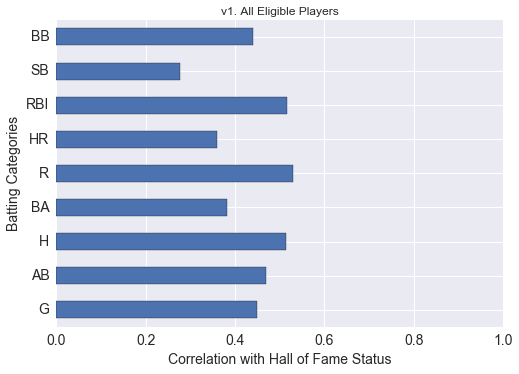

In [67]:
ax = data_all.loc['HOF'].plot(kind = 'barh', title = 
                              'v1. All Eligible Players', 
                              legend = False, fontsize=14)

ax.set_ylabel("Batting Categories",fontsize=14)
ax.set_xlabel("Correlation with Hall of Fame Status",fontsize=14)
ax.set_xlim([0.0, 1.0])


plt.show()

<hr>

<b>Comparing Statistics for Players Who Retired Prior to 1900</b>

In [68]:
# analyze select batting stats for all eligible players who are not pitchers and retired prior to 1900

hof_elg_bat_stats_nopitch_1900.describe()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,12.534483,915.655172,3661.431034,983.172414,0.263966,626.517241,23.982759,441.844828,131.706897,256.465517
std,2.378379,366.994553,1472.340137,456.182333,0.029409,337.371847,24.558910,253.779487,130.608160,225.914843
min,10.000000,373.000000,1359.000000,276.000000,0.203000,182.000000,0.000000,45.000000,0.000000,26.000000
25%,11.000000,644.250000,2528.750000,670.500000,0.244250,395.500000,6.250000,238.250000,34.750000,109.750000
50%,12.000000,886.000000,3530.000000,908.000000,0.266000,555.500000,17.500000,405.500000,68.500000,175.500000
75%,13.000000,1086.750000,4363.000000,1223.000000,0.282750,773.750000,31.750000,543.750000,201.500000,346.000000
max,19.000000,2135.000000,8291.000000,2467.000000,0.339000,1678.000000,138.000000,1322.000000,568.000000,1002.000000


In [69]:
# analyze all select batting stats for hall of fame players who are not pitchers and retired prior to 1900

hof_batters_1900.describe()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB
count,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,18.500000,2066.000000,8042.50000,2358.500000,0.294000,1649.000000,95.500000,1194.500000,406.000000,991.500000
std,0.707107,97.580736,351.43207,153.442172,0.032527,41.012193,60.104076,180.312229,229.102597,14.849242
min,18.000000,1997.000000,7794.00000,2250.000000,0.271000,1620.000000,53.000000,1067.000000,244.000000,981.000000
25%,18.250000,2031.500000,7918.25000,2304.250000,0.282500,1634.500000,74.250000,1130.750000,325.000000,986.250000
50%,18.500000,2066.000000,8042.50000,2358.500000,0.294000,1649.000000,95.500000,1194.500000,406.000000,991.500000
75%,18.750000,2100.500000,8166.75000,2412.750000,0.305500,1663.500000,116.750000,1258.250000,487.000000,996.750000
max,19.000000,2135.000000,8291.00000,2467.000000,0.317000,1678.000000,138.000000,1322.000000,568.000000,1002.000000


<i>Correlation</i>

In [70]:
# explore correlation using Pearson's R

hof_elg_bat_stats_nopitch_1900.corr()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB,HOF
Y,1.000000,0.554216,0.540400,0.486335,0.028360,0.439712,0.260268,0.390353,0.047559,0.376454,0.478151
G,0.554216,1.000000,0.992154,0.962697,0.344038,0.920177,0.736642,0.910194,0.680292,0.847798,0.597539
AB,0.540400,0.992154,1.000000,0.978161,0.395390,0.937846,0.729413,0.912765,0.665805,0.815823,0.567243
H,0.486335,0.962697,0.978161,1.000000,0.557581,0.967233,0.798899,0.950357,0.656977,0.842710,0.574732
BA,0.028360,0.344038,0.395390,0.557581,1.000000,0.568894,0.577036,0.585088,0.316692,0.430880,0.194685
R,0.439712,0.920177,0.937846,0.967233,0.568894,1.000000,0.760602,0.886612,0.715913,0.882191,0.577756
HR,0.260268,0.736642,0.729413,0.798899,0.577036,0.760602,1.000000,0.874503,0.508326,0.758468,0.555136
RBI,0.390353,0.910194,0.912765,0.950357,0.585088,0.886612,0.874503,1.000000,0.625517,0.811815,0.565376
SB,0.047559,0.680292,0.665805,0.656977,0.316692,0.715913,0.508326,0.625517,1.000000,0.727219,0.400352
BB,0.376454,0.847798,0.815823,0.842710,0.430880,0.882191,0.758468,0.811815,0.727219,1.000000,0.620241


In [71]:
# create a bar graph to visualize the correlations

# define variable to store the data
data_1900 = hof_elg_bat_stats_nopitch_1900.corr()

# redefine variable to include all columns but the HOF column
data_1900 = data_1900[['G', 'AB', 'H', 'BA', 'R', 'HR', 'RBI', 'SB', 'BB']]

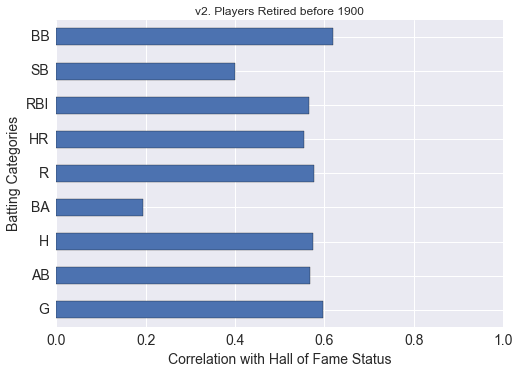

In [72]:
ax = data_1900.loc['HOF'].plot(kind = 'barh', title = 
                               'v2. Players Retired before 1900', 
                          legend = False, fontsize=14)

ax.set_ylabel("Batting Categories",fontsize=14)
ax.set_xlabel("Correlation with Hall of Fame Status",fontsize=14)
ax.set_xlim([0.0, 1.0])


plt.show()

<hr>

<b>Comparing Statistics for Players Who Retired From 1900 to 1930</b>

In [73]:
# analyze all select batting stats for eligible players who are not pitchers and retired between 1900 and 1930

hof_elg_bat_stats_nopitch_1930.describe()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.0000,250.000000
mean,13.744000,1241.076000,4408.596000,1217.000000,0.269772,615.428000,28.224000,505.900000,179.8160,384.188000
std,3.181028,465.357631,1902.990429,592.706548,0.027826,360.704527,28.895147,289.674367,143.7726,227.702231
min,10.000000,243.000000,488.000000,106.000000,0.170000,44.000000,0.000000,29.000000,4.0000,23.000000
25%,11.000000,910.250000,3007.750000,790.750000,0.254000,356.750000,8.000000,298.750000,67.5000,219.500000
50%,13.000000,1247.000000,4294.000000,1185.000000,0.269000,563.500000,18.000000,448.000000,153.0000,342.000000
75%,16.000000,1563.750000,5644.250000,1560.250000,0.286750,794.500000,39.000000,674.500000,232.0000,483.250000
max,25.000000,2517.000000,9589.000000,3242.000000,0.356000,1719.000000,196.000000,1599.000000,912.0000,1187.000000


In [74]:
# analyze all select batting stats for hall of fame players who are not pitchers and retired between 1900 and 1930

hof_batters_1930.describe()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000,20.000000,20.000000,20.000000
mean,17.250000,1829.35000,6933.650000,2158.100000,0.309600,1217.600000,63.200,983.000000,390.600000,654.700000
std,3.109832,418.51445,1691.489449,596.523693,0.026484,359.291174,37.812,333.307666,191.353462,219.964614
min,10.000000,1211.00000,4297.000000,1273.000000,0.253000,579.000000,11.000,538.000000,153.000000,347.000000
25%,15.000000,1552.00000,5887.250000,1680.000000,0.295500,911.000000,32.500,751.000000,233.500000,505.250000
50%,17.500000,1773.00000,6614.500000,2078.500000,0.312500,1272.500000,65.000,911.500000,362.500000,617.500000
75%,19.250000,2152.75000,8573.750000,2666.750000,0.325750,1546.750000,96.250,1260.750000,465.000000,764.500000
max,22.000000,2517.00000,9589.000000,3242.000000,0.346000,1719.000000,132.000,1599.000000,912.000000,1187.000000


<i>Correlation</i>

In [75]:
# explore correlation using Pearson's R

hof_elg_bat_stats_nopitch_1930.corr()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB,HOF
Y,1.000000,0.734574,0.709571,0.692707,0.320154,0.645705,0.376733,0.663585,0.502729,0.480895,0.325661
G,0.734574,1.000000,0.986133,0.955805,0.480451,0.873058,0.533194,0.847748,0.687217,0.752462,0.373520
AB,0.709571,0.986133,1.000000,0.980295,0.521369,0.916703,0.544935,0.869690,0.735037,0.742976,0.392063
H,0.692707,0.955805,0.980295,1.000000,0.655610,0.945528,0.608006,0.905103,0.744265,0.739666,0.469156
BA,0.320154,0.480451,0.521369,0.655610,1.000000,0.656274,0.587271,0.643563,0.473444,0.479871,0.422914
R,0.645705,0.873058,0.916703,0.945528,0.656274,1.000000,0.581148,0.832658,0.861057,0.827723,0.493276
HR,0.376733,0.533194,0.544935,0.608006,0.587271,0.581148,1.000000,0.735883,0.327755,0.416874,0.357657
RBI,0.663585,0.847748,0.869690,0.905103,0.643563,0.832658,0.735883,1.000000,0.603364,0.580446,0.486655
SB,0.502729,0.687217,0.735037,0.744265,0.473444,0.861057,0.327755,0.603364,1.000000,0.747129,0.433194
BB,0.480895,0.752462,0.742976,0.739666,0.479871,0.827723,0.416874,0.580446,0.747129,1.000000,0.351027


In [76]:
# create a bar graph to visualize the correlations

# define variable to store the data
data_1930 = hof_elg_bat_stats_nopitch_1930.corr()

# redefine variable to include all columns but the HOF column
data_1930 = data_1930[['G', 'AB', 'H', 'BA', 'R', 'HR', 'RBI', 'SB', 'BB']]

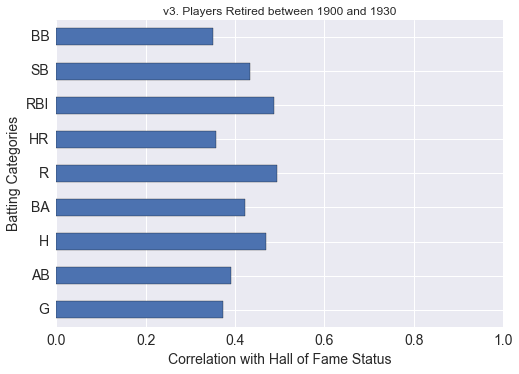

In [77]:
ax = data_1930.loc['HOF'].plot(kind = 'barh', title = 
                          'v3. Players Retired between 1900 and 1930', 
                          legend = False, fontsize=14)

ax.set_ylabel("Batting Categories",fontsize=14)
ax.set_xlabel("Correlation with Hall of Fame Status",fontsize=14)
ax.set_xlim([0.0, 1.0])


plt.show()

<hr>

<b>Comparing Statistics for Players Who Retired From 1930 to 1960</b>

In [78]:
# analyze all select batting stats for eligible players who are not pitchers and retired between 1930 and 1960

hof_elg_bat_stats_nopitch_1960.describe()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,13.713068,1218.585227,4184.082386,1192.977273,0.278091,602.960227,76.343750,567.090909,57.559659,444.792614
std,3.273836,488.830506,1960.372913,629.334877,0.025556,361.554114,81.215015,355.118619,67.261889,284.724087
min,10.000000,227.000000,482.000000,136.000000,0.208000,34.000000,0.000000,52.000000,1.000000,53.000000
25%,11.000000,830.000000,2619.500000,705.750000,0.261750,310.250000,24.000000,288.500000,18.000000,231.000000
50%,13.000000,1169.000000,4081.000000,1119.000000,0.276500,544.000000,47.000000,490.000000,39.000000,370.500000
75%,16.000000,1496.500000,5472.750000,1547.750000,0.296000,833.500000,96.000000,773.750000,68.250000,588.500000
max,25.000000,2826.000000,10078.000000,3315.000000,0.358000,1888.000000,511.000000,1995.000000,744.000000,1708.000000


In [79]:
# analyze all select batting stats for hall of fame players who are not pitchers and retired between 1930 and 1960

hof_batters_1960.describe()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,16.807692,1905.788462,6992.346154,2167.442308,0.308827,1165.730769,175.576923,1127.038462,118.115385,802.673077
std,3.741859,374.700473,1431.570246,500.728740,0.021155,301.996437,117.106679,328.625716,121.075192,293.734689
min,10.000000,1215.000000,4205.000000,1161.000000,0.258000,601.000000,27.000000,563.000000,8.000000,334.000000
25%,14.000000,1659.750000,5984.750000,1776.250000,0.296500,942.750000,75.500000,880.500000,53.500000,619.500000
50%,17.000000,1884.000000,6957.000000,2136.500000,0.312000,1165.500000,166.500000,1097.000000,81.500000,782.000000
75%,19.250000,2152.000000,7826.750000,2484.250000,0.320250,1294.500000,242.500000,1305.250000,145.750000,932.500000
max,25.000000,2826.000000,10078.000000,3315.000000,0.358000,1888.000000,511.000000,1995.000000,744.000000,1708.000000


<i>Correlation</i>

In [80]:
# explore correlation using Pearson's R

hof_elg_bat_stats_nopitch_1960.corr()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB,HOF
Y,1.000000,0.746069,0.668858,0.652498,0.281480,0.562648,0.304619,0.574675,0.389945,0.517848,0.394103
G,0.746069,1.000000,0.984323,0.966045,0.546498,0.920096,0.570626,0.878889,0.578850,0.826489,0.586119
AB,0.668858,0.984323,1.000000,0.986610,0.585542,0.949210,0.572450,0.887779,0.600596,0.812720,0.597253
H,0.652498,0.966045,0.986610,1.000000,0.688607,0.964390,0.589735,0.911169,0.606078,0.798028,0.645570
BA,0.281480,0.546498,0.585542,0.688607,1.000000,0.666075,0.433729,0.658640,0.365695,0.436609,0.501434
R,0.562648,0.920096,0.949210,0.964390,0.666075,1.000000,0.650747,0.896695,0.630445,0.871070,0.648958
HR,0.304619,0.570626,0.572450,0.589735,0.433729,0.650747,1.000000,0.818763,0.116085,0.612856,0.509424
RBI,0.574675,0.878889,0.887779,0.911169,0.658640,0.896695,0.818763,1.000000,0.423936,0.770472,0.657405
SB,0.389945,0.578850,0.600596,0.606078,0.365695,0.630445,0.116085,0.423936,1.000000,0.513132,0.375357
BB,0.517848,0.826489,0.812720,0.798028,0.436609,0.871070,0.612856,0.770472,0.513132,1.000000,0.524050


In [81]:
# create a bar graph to visualize the correlations

# define variable to store the data
data_1960 = hof_elg_bat_stats_nopitch_1960.corr()

# redefine variable to include all columns but the HOF column
data_1960 = data_1960[['G', 'AB', 'H', 'BA', 'R', 'HR', 'RBI', 'SB', 'BB']]

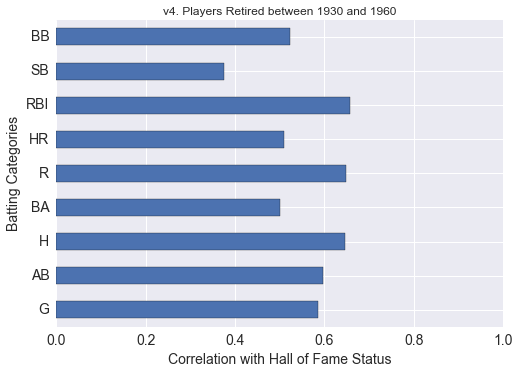

In [82]:
ax = data_1960.loc['HOF'].plot(kind = 'barh', title = 'v4. Players Retired between 1930 and 1960', 
                          legend = False, fontsize=14)

ax.set_ylabel("Batting Categories",fontsize=14)
ax.set_xlabel("Correlation with Hall of Fame Status",fontsize=14)
ax.set_xlim([0.0, 1.0])


plt.show()

<hr>

<b>Comparing Statistics for Players Who Retired From 1960 to 1990</b>

In [83]:
# analyze all select batting stats for eligible players who are not pitchers and retired between 1960 and 1990

hof_elg_bat_stats_nopitch_1990.describe()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,14.099187,1278.666667,4101.154472,1087.287805,0.257574,528.747967,106.707317,503.525203,64.009756,418.330081
std,3.424607,578.055159,2289.047410,665.982268,0.021587,357.140635,109.390891,363.877023,95.071976,305.563377
min,10.000000,208.000000,368.000000,79.000000,0.161000,37.000000,0.000000,44.000000,0.000000,25.000000
25%,11.000000,855.000000,2328.000000,581.000000,0.243000,253.000000,30.000000,230.500000,13.000000,204.000000
50%,13.000000,1196.000000,3780.000000,977.000000,0.258000,457.000000,76.000000,422.000000,30.000000,343.000000
75%,16.000000,1641.000000,5535.000000,1475.000000,0.272000,714.500000,147.000000,667.500000,75.500000,553.500000
max,25.000000,3562.000000,14053.000000,4256.000000,0.328000,2174.000000,755.000000,2297.000000,938.000000,1865.000000


In [84]:
# analyze all select batting stats for hall of fame players who are not pitchers and retired between 1960 and 1990

hof_batters_1990.describe()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,19.677419,2513.161290,9122.322581,2603.774194,0.284968,1411.064516,372.258065,1384.806452,174.709677,1090.451613
std,2.495157,329.505903,1286.249442,430.272294,0.017659,293.990129,192.757874,382.531517,207.443839,397.084528
min,15.000000,2089.000000,7161.000000,2016.000000,0.256000,769.000000,29.000000,586.000000,17.000000,447.000000
25%,18.000000,2229.500000,8145.000000,2244.000000,0.270500,1230.500000,254.000000,1219.000000,49.500000,748.500000
50%,19.000000,2435.000000,9232.000000,2574.000000,0.285000,1322.000000,389.000000,1451.000000,90.000000,1018.000000
75%,22.000000,2713.000000,9935.000000,2895.500000,0.297000,1580.500000,516.500000,1589.500000,216.000000,1411.000000
max,23.000000,3308.000000,12364.000000,3771.000000,0.328000,2174.000000,755.000000,2297.000000,938.000000,1865.000000


<i>Correlation</i>

In [85]:
# explore correlation using Pearson's R

hof_elg_bat_stats_nopitch_1990.corr()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB,HOF
Y,1.000000,0.811275,0.749064,0.739522,0.436600,0.714310,0.590807,0.725483,0.307938,0.670440,0.375590
G,0.811275,1.000000,0.982369,0.968984,0.594213,0.947718,0.731862,0.901228,0.461198,0.849281,0.492434
AB,0.749064,0.982369,1.000000,0.992694,0.626591,0.965988,0.728465,0.906202,0.491885,0.827640,0.505799
H,0.739522,0.968984,0.992694,1.000000,0.691394,0.970978,0.726096,0.910011,0.494163,0.813710,0.525054
BA,0.436600,0.594213,0.626591,0.691394,1.000000,0.649015,0.446667,0.611359,0.326411,0.468904,0.292606
R,0.714310,0.947718,0.965988,0.970978,0.649015,1.000000,0.789019,0.916801,0.550379,0.884437,0.569656
HR,0.590807,0.731862,0.728465,0.726096,0.446667,0.789019,1.000000,0.926439,0.190995,0.775768,0.559750
RBI,0.725483,0.901228,0.906202,0.910011,0.611359,0.916801,0.926439,1.000000,0.307637,0.839007,0.558454
SB,0.307938,0.461198,0.491885,0.494163,0.326411,0.550379,0.190995,0.307637,1.000000,0.397073,0.268487
BB,0.670440,0.849281,0.827640,0.813710,0.468904,0.884437,0.775768,0.839007,0.397073,1.000000,0.507194


In [86]:
# create a bar graph to visualize the correlations

# define variable to store the data
data_1990 = hof_elg_bat_stats_nopitch_1990.corr()

# redefine variable to include all columns but the HOF column
data_1990 = data_1990[['G', 'AB', 'H', 'BA', 'R', 'HR', 'RBI', 'SB', 'BB']]

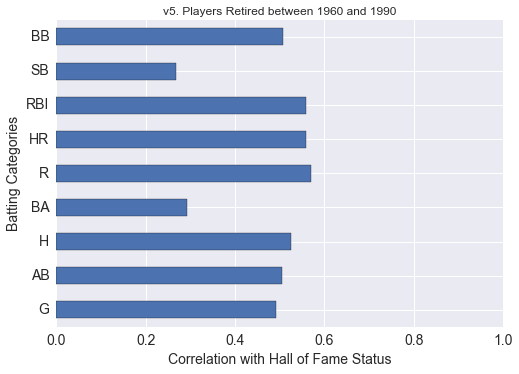

In [87]:
ax = data_1990.loc['HOF'].plot(kind = 'barh', title = 'v5. Players Retired between 1960 and 1990', 
                          legend = False, fontsize=14)

ax.set_ylabel("Batting Categories",fontsize=14)
ax.set_xlabel("Correlation with Hall of Fame Status",fontsize=14)
ax.set_xlim([0.0, 1.0])

plt.show()

<hr>

<b>Comparing Statistics for Players Who Retired From 1990 to 2010</b>

In [88]:
# analyze all select batting stats for eligible players who are not pitchers and retired between 1990 and 2010

hof_elg_bat_stats_nopitch_2010.describe()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,14.175701,1258.267290,4110.530841,1111.287850,0.263052,572.342056,121.824299,541.801869,93.343925,416.164486
std,3.469364,578.959325,2330.634803,681.695539,0.020892,385.825659,115.270399,379.877683,132.162996,321.165619
min,10.000000,140.000000,244.000000,46.000000,0.189000,20.000000,1.000000,21.000000,0.000000,17.000000
25%,11.000000,827.000000,2241.500000,575.000000,0.251000,289.500000,38.500000,255.500000,14.000000,194.500000
50%,14.000000,1202.000000,3774.000000,972.000000,0.263000,483.000000,85.000000,443.000000,47.000000,338.000000
75%,16.000000,1587.000000,5425.500000,1497.000000,0.276000,757.500000,165.500000,732.500000,114.000000,544.500000
max,29.000000,3081.000000,11551.000000,3319.000000,0.338000,2295.000000,762.000000,1996.000000,1406.000000,2558.000000


In [89]:
# analyze all select batting stats for hall of fame players who are not pitchers

hof_batters_2010.describe()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,20.263158,2544.789474,9526.631579,2760.578947,0.290474,1482.157895,312.421053,1336.789474,311.842105,1049.473684
std,3.380370,377.489011,1474.054583,421.255968,0.019395,310.011337,131.076447,309.900446,315.536098,388.732609
min,12.000000,1783.000000,6911.000000,2092.000000,0.262000,1025.000000,28.000000,793.000000,17.000000,450.000000
25%,19.000000,2308.500000,8292.000000,2371.000000,0.279000,1297.000000,222.000000,1124.500000,119.000000,819.000000
50%,20.000000,2573.000000,9396.000000,2774.000000,0.285000,1494.000000,297.000000,1307.000000,271.000000,1032.000000
75%,21.000000,2853.000000,10918.500000,3141.500000,0.303000,1639.500000,429.000000,1593.000000,396.500000,1144.500000
max,29.000000,3081.000000,11551.000000,3319.000000,0.338000,2295.000000,521.000000,1917.000000,1406.000000,2190.000000


<i>Correlation</i>

In [90]:
# explore correlation using Pearson's R

hof_elg_bat_stats_nopitch_2010.corr()

,Y,G,AB,H,BA,R,HR,RBI,SB,BB,HOF
Y,1.000000,0.790392,0.739369,0.731532,0.380417,0.712604,0.539171,0.672443,0.449849,0.650596,0.337011
G,0.790392,1.000000,0.982400,0.972659,0.597796,0.948391,0.725198,0.896875,0.544246,0.852145,0.426803
AB,0.739369,0.982400,1.000000,0.993906,0.617772,0.967306,0.744942,0.916505,0.557103,0.840853,0.446345
H,0.731532,0.972659,0.993906,1.000000,0.676451,0.970821,0.739319,0.917762,0.558470,0.839340,0.464692
BA,0.380417,0.597796,0.617772,0.676451,1.000000,0.628684,0.415947,0.582566,0.349993,0.503944,0.252098
R,0.712604,0.948391,0.967306,0.970821,0.628684,1.000000,0.786151,0.912469,0.630239,0.907456,0.452919
HR,0.539171,0.725198,0.744942,0.739319,0.415947,0.786151,1.000000,0.930468,0.191406,0.765821,0.317582
RBI,0.672443,0.896875,0.916505,0.917762,0.582566,0.912469,0.930468,1.000000,0.328342,0.836892,0.401953
SB,0.449849,0.544246,0.557103,0.558470,0.349993,0.630239,0.191406,0.328342,1.000000,0.512872,0.317538
BB,0.650596,0.852145,0.840853,0.839340,0.503944,0.907456,0.765821,0.836892,0.512872,1.000000,0.378743


In [91]:
# create a bar graph to visualize the correlations

# define variable to store the data
data_2010 = hof_elg_bat_stats_nopitch_2010.corr()

# redefine variable to include all columns but the HOF column
data_2010 = data_2010[['G', 'AB', 'H', 'BA', 'R', 'HR', 'RBI', 'SB', 'BB']]

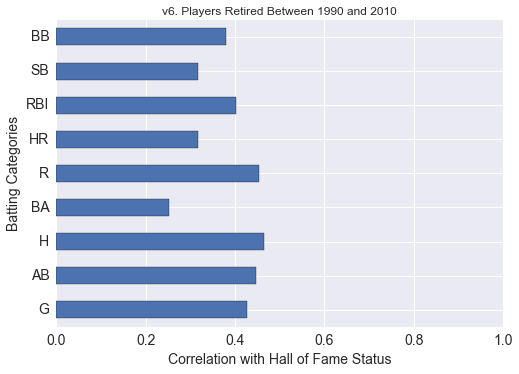

In [92]:
ax = data_2010.loc['HOF'].plot(kind = 'barh', title = 'v6. Players Retired Between 1990 and 2010', 
                          legend = False, fontsize=14)

ax.set_ylabel("Batting Categories",fontsize=14)
ax.set_xlabel("Correlation with Hall of Fame Status",fontsize=14)
ax.set_xlim([0.0, 1.0])



plt.show()

<hr>

<b>Correlation</b>

<i>Comparing the Correlation Across the Defined Eras</i>

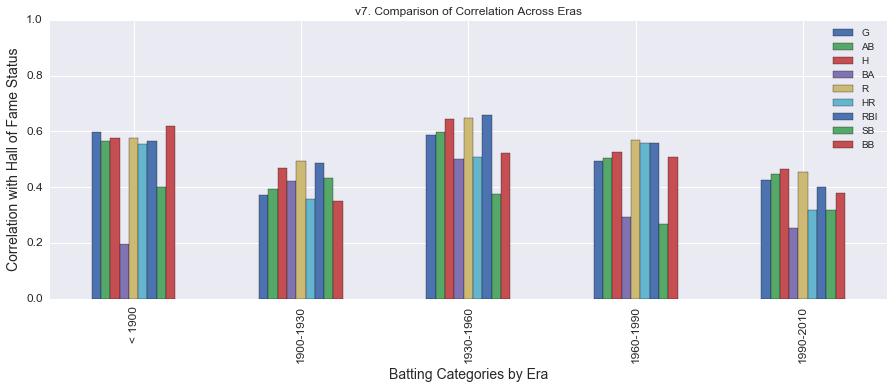

In [93]:
# Create a plot that includes each year's analysis

data_1 = data_1900.loc['HOF']
data_2 = data_1930.loc['HOF']
data_3 = data_1960.loc['HOF']
data_4 = data_1990.loc['HOF']
data_5 = data_2010.loc['HOF']

data_1.name = '< 1900'
data_2.name = '1900-1930'
data_3.name = '1930-1960'
data_4.name = '1960-1990'
data_5.name = '1990-2010'


compare_correlation = pd.DataFrame([data_1, data_2, data_3, data_4, data_5], 
                                   columns=['G', 'AB', 'H', 'BA', 'R', 'HR', 'RBI', 'SB', 'BB'])

ax = compare_correlation.plot.bar(figsize = (15, 5), fontsize = 12, title = 'v7. Comparison of Correlation Across Eras')
ax.set_xlabel("Batting Categories by Era",fontsize=14)
ax.set_ylabel("Correlation with Hall of Fame Status",fontsize=14)
ax.set_ylim([0.0, 1.0])
plt.show()


<i>Correlation of Individual Categories and Corresponding P-Values</i>

Though Pearson's R is displayed above as the Correlation Coefficient, further significance can be determined if the corresponding P-Value is very small (far less than .001 in most of these cases) and lower than Pearson's R.

In [94]:
# Find Pearson's R and corresponding P-Value for each category
from scipy.stats.stats import pearsonr

In [95]:
# Games
pearsonr(hof_elg_bat_stats_nopitch['G'], hof_elg_bat_stats_nopitch['HOF'])

(0.44817306614255797, 1.6819310113643825e-91)

In [96]:
# At Bats
pearsonr(hof_elg_bat_stats_nopitch['AB'], hof_elg_bat_stats_nopitch['HOF'])

(0.46998132425303102, 1.2262504516079468e-101)

In [97]:
# Hits
pearsonr(hof_elg_bat_stats_nopitch['H'], hof_elg_bat_stats_nopitch['HOF'])

(0.51518662822477779, 3.8256764065168101e-125)

In [98]:
# Batting Average
pearsonr(hof_elg_bat_stats_nopitch['BA'], hof_elg_bat_stats_nopitch['HOF'])

(0.38199645725418518, 6.3325728100815147e-65)

In [99]:
# Runs
pearsonr(hof_elg_bat_stats_nopitch['R'], hof_elg_bat_stats_nopitch['HOF'])

(0.53069662378659088, 4.647192770521209e-134)

In [100]:
# Home Runs
pearsonr(hof_elg_bat_stats_nopitch['HR'], hof_elg_bat_stats_nopitch['HOF'])

(0.35889507989407626, 5.4827249143927722e-57)

In [101]:
# Runs Batted In
pearsonr(hof_elg_bat_stats_nopitch['RBI'], hof_elg_bat_stats_nopitch['HOF'])

(0.51551638591615101, 2.4999046969770423e-125)

In [102]:
# Stolen Bases
pearsonr(hof_elg_bat_stats_nopitch['SB'], hof_elg_bat_stats_nopitch['HOF'])

(0.27619678772103085, 1.5485854935400278e-33)

In [103]:
# Base on Balls
pearsonr(hof_elg_bat_stats_nopitch['BB'], hof_elg_bat_stats_nopitch['HOF'])

(0.43967516155778336, 9.5600239969304312e-88)

<i>Batting Average with a low Correlation Coefficient</i>

For the era representing players who retired prior to 1900, the correlation for Batting Average is very low.  

In [104]:
# Batting Average Correlation and P-Value for players retiring prior to 1900
pearsonr(hof_elg_bat_stats_nopitch_1900['BA'], hof_elg_bat_stats_nopitch_1900['HOF'])

(0.19468477176282437, 0.1430703763706507)

In [105]:
# checking size of population, as p-value may not be reliable for a population less than 60
len(hof_elg_bat_stats_nopitch_1900.index)

58

<b>Hall of Fame Players Average Stats vs. Other Eligible Players of the Same Era</b>

In [106]:
# define a function that can take a statistical category as an argument and displays a plot
# comparing Average Career Stats of Hall of Fame players vs. All Eligible Players
# and how these differences fluctuate across eras

def plot_all_vs_hof(category):
    data_1900_d = hof_elg_bat_stats_nopitch_1900.describe()
    data_1930_d = hof_elg_bat_stats_nopitch_1930.describe()
    data_1960_d = hof_elg_bat_stats_nopitch_1960.describe()
    data_1990_d = hof_elg_bat_stats_nopitch_1990.describe()
    data_2010_d = hof_elg_bat_stats_nopitch_2010.describe()

    data_a = data_1900_d.loc['mean']
    data_b = data_1930_d.loc['mean']
    data_c = data_1960_d.loc['mean']
    data_d = data_1990_d.loc['mean']
    data_e = data_2010_d.loc['mean']

    a_data_1900 = hof_batters_1900.describe()
    b_data_1930 = hof_batters_1930.describe()
    c_data_1960 = hof_batters_1960.describe()
    d_data_1990 = hof_batters_1990.describe()
    e_data_2010 = hof_batters_2010.describe()

    a_data = a_data_1900.loc['mean']
    b_data = b_data_1930.loc['mean']
    c_data = c_data_1960.loc['mean']
    d_data = d_data_1990.loc['mean']
    e_data = e_data_2010.loc['mean']

    data_a.name = '< 1900'
    data_b.name = '1900-1930'
    data_c.name = '1930-1960'
    data_d.name = '1960-1990'
    data_e.name = '1990-2010'

    a_data.name = '< 1900'
    b_data.name = '1900-1930'
    c_data.name = '1930-1960'
    d_data.name = '1960-1990'
    e_data.name = '1990-2010'

    compare_all = pd.DataFrame([data_a, data_b, data_c, data_d, data_e], columns=[category])
    compare_hof = pd.DataFrame([a_data, b_data, c_data, d_data, e_data], columns=[category])
       
    ax = compare_all.plot.line(title = category + ':  Hall of Fame Players vs. All Eligible Players', label='All')
    compare_hof.plot.line(ax=ax, label='HOF')
    
    ax.set_xlabel("by Era",fontsize=14)
    ax.set_ylabel("Average Career " + category,fontsize=14)
    ax.legend(['All', 'HOF'])

    plt.show()

<i>v8. Hall of Fame Players vs All Eligible Players:  Career Stats Compared During Each Era</i>

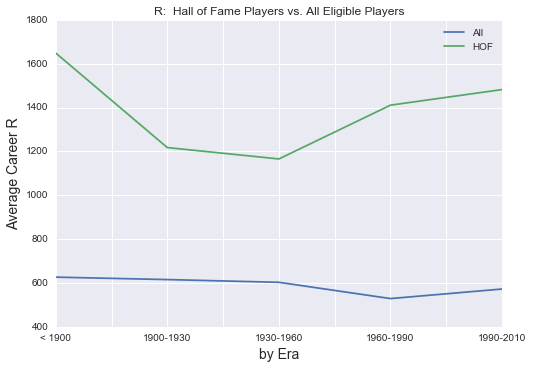

In [107]:
# Categories with the largest correlation

# Runs

plot_all_vs_hof('R')

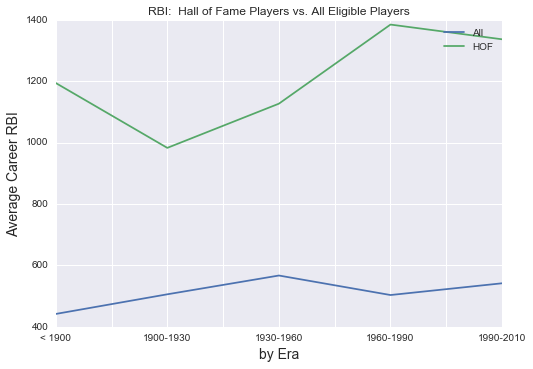

In [108]:
# RBI

plot_all_vs_hof('RBI')

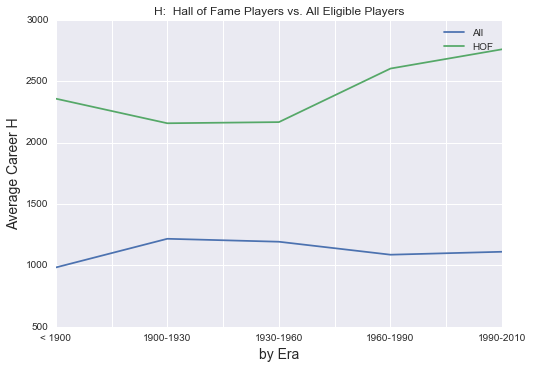

In [109]:
# Hits

plot_all_vs_hof('H')

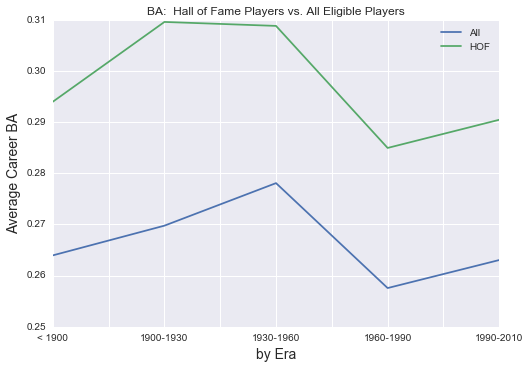

In [110]:
# Now the Categories that didn't perform as well as we thought

# Batting Average

plot_all_vs_hof('BA')

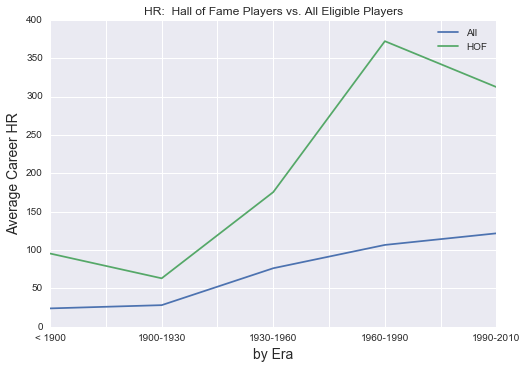

In [111]:
# Home Runs

plot_all_vs_hof('HR')

<b>Investigating Cases where the player with the largest statistics are not in the hall of fame</b>

In [112]:
# Find the index of the player with the highest number of Hits

np.argmax(hof_elg_bat_stats_nopitch['H'])

14518

In [113]:
# Find player record by the index

hof_elg_bat_stats_nopitch.loc[14518]

playerID    rosepe01
Y                 25
G               3562
AB             14053
H               4256
BA             0.303
R               2165
HR               160
RBI             1314
SB               198
BB              1566
HOF            False
Name: 14518, dtype: object

In [114]:
# Find the index of the player with the highest number of Home Runs

np.argmax(hof_elg_bat_stats_nopitch['HR'])

1515

In [115]:
# Find player record by the index

hof_elg_bat_stats_nopitch.loc[1515]

playerID    bondsba01
Y                  22
G                2986
AB               9847
H                2935
BA              0.298
R                2227
HR                762
RBI              1996
SB                514
BB               2558
HOF             False
Name: 1515, dtype: object

In [116]:
# Find the index of the player with the highest number of Games Played

np.argmax(hof_elg_bat_stats_nopitch['G'])

14518

In [117]:
# Find player record by the index

hof_elg_bat_stats_nopitch.loc[14518]

playerID    rosepe01
Y                 25
G               3562
AB             14053
H               4256
BA             0.303
R               2165
HR               160
RBI             1314
SB               198
BB              1566
HOF            False
Name: 14518, dtype: object

In [118]:
# Find the index of the player with the highest number of Base on Balls

np.argmax(hof_elg_bat_stats_nopitch['BB'])

1515

In [119]:
# Find player record by the index

hof_elg_bat_stats_nopitch.loc[1515]

playerID    bondsba01
Y                  22
G                2986
AB               9847
H                2935
BA              0.298
R                2227
HR                762
RBI              1996
SB                514
BB               2558
HOF             False
Name: 1515, dtype: object

<hr>
<hr>
<hr>

## Discussion

<b>Limitations</b>

This is a superficial explanation of the statistics as numbers.  The game of baseball, however, is played by humans, and most importantly, Hall of Fame voting is also done by humans.  Each voter brings in their own personalities, values, and bias to the table when voting.  The analysis in this project is objective, but the voting process is subjective.  Additional limitations of the project:

<i>Pitchers and batting statistics</i> - Pitchers generally do not accumulate volumes of batting statistics, so they were eliminated from the final analysis.  At least one former pitcher was elected to the Hall of Fame also possessing, what would be considered by this analysis, significant batting statistics:  Babe Ruth.  While Babe Ruth is well known, others may not be as well known, so it would take some additional analysis to include these players, perhaps on an individual basis.  The lack of a player as significant as Babe Ruth in the hall of fame table may skew the analysis.

<i>Changes to Rules</i> - Throughout the history of baseball there have been rules changes that may have affected the statistics of given players, such as the addition of the <i>Designated Hitter</i> who is an offensive specialist with no defensive responsibilities.  

<i>Changes to/Differences in Equipment, Playing Surfaces, Stadiums</i> - Equipment like bats and balls may have been changed over the course of history.  Synthetic surfaces may react differently to bouncing balls than natural turf.  Smaller or larger stadiums may influence the amount of home runs.  Players playing in different climates more often may have advantages over others.  

<i>Changes to Players, Training/Nutrition/Supplement Regimines</i> - Modern players may pay more close attention to weight training, giving them more power, perhaps resulting in more home runs or harder hit balls.  

<i>Ineligible Players, Cheating and Suspicions of Cheating</i> - The analysis demonstrates that <b>Home Runs</b> and Total <b>Hits</b> are both significantly correlated to Hall of Fame selection.  In both instances, the career leaders in these categorie are not in the Hall of Fame.  Pete Rose is career leader in Hits, but is not in the Hall of Fame.  Barry Bonds is the career Home Runs leader, but he is also not in the hall of fame.  And while these are obvious examples of anomolies, there maybe less obvious examples of players that may have batting statistics similar to players in the Hall of Fame, who have not been inducted, for reasons other than baseball achievement.  

<i>Team Success</i> - Baseball is a team game, and team success may play a part in Hall of Fame consideration, but also in how well a player performs.  It is conceivable that a team's success could increase a player's profile in a subjective voting process, and the inverse is also conceivable.  Additionally, playing alongside other successful players could impact statistics.  For example, a strong team will have fewer 'outs,' allowing a batter to get more <b>At-Bats</b>, which this alaysis has demonstrated to be significant factor in hall of fame selection.

<i>Significant Correlation Between Statistical Categories</i> - It is difficult to put a spotlight on individual batting statitical categories without speaking about success in others.  This statistical analysis demonstrates a significant correlation between many of the statistical categories.  In some ways they are 'joined at the hip.'  

In many of the above instances of limitations, a potential correction is the analysis of different defined thirty-year eras.  These eras, however, were arbitrarily defined, and were not specifically chosen to correct for any particular challenge of the analysis.

<b>Findings</b>

<i>Significance of Statistical Categories</i>

Given a confidence level of 95% (default interval of modules), each of the selected categories considered by the analysis has a significant positive correlation to Hall of Fame Selection.

In terms of the categories demonstrating strongest positive correlation, <b>Runs</b> (r = 0.531) is the strongest in the overall analysis.  The next two categories in terms of strength of correlation is <b>RBI</b> (r = 0.516) and <b>Hits</b> (r = 0.515).

Though the positive correlation remains significant, neither of the categories hypothesized to be the most significant measured to be so.  In fact, not only is <b>Batting Average</b> one of the least significant categories studied by this project, it is one of the least significant factors for each of the era's analyzed.  For players of the earliest era (who retired prior to 1900), the correlation very nearly lacks significance (r = 0.195, p-value = 0.143, N = 58, which may not be a large enough population for a reliable p-value calculation).  The significance of the positive correlation during the most recent era (players who retired between 1990 and 2010) is strong, but the correlation itself (r = .252) is again the smallest measured of the categories considered.

<b>Home Runs</b> (r = 0.359), while having a significant positive correlation with Hall of Fame status, is still among the lower correlated statistics.  Unlike Batting Average, Home Runs is a statistic that has been more significant in certain eras than in others.  It was among the top statistics for players retiring prior to 1900 (r = 0.555) as well as between 1960 and 1990 (r = 0.560).


<i>Changes over Time</i>

As demonstrated with the <b>Home Run</b> category above, certain statistical categories have varied in significance over time, in their ability to determine Hall of Fame status.  <b>Stolen Bases</b> is a good example of a statistic that was among the more significant categories over one era (players retiring between 1900 and 1930, r = 0.433), yet overall is the least correlated category considered in this analysis (r = 0.276).

Overall correlation of all statistics varies over time (figure v7) suggesting that other factors outside of this analysis may have had a relatively higher correlation with Hall of Fame induction during certain eras (e.g, defensive performance, team performance, or character rationale).


<b>Implications and Observations</b>

Though correlation does not equal causation, it can be implied from the analysis that batting average may not be as significant a statistic as generally accepted, given that the yearly <i>Batting Champion</i> award is given to the player with the highest Batting Average.  

Batting Average as a statistic is not as multidimensional as Runs.  Scoring a run can involve hitting a home run, or it can involve taking a walk (BB) and stealing a base to get into a better scoring position.  RBI is also a statistic that is multidimensional, as a player can earn an RBI with a walk or a sacrifice fly, neither of which is a hit.  The correlation of these statistics with one another is significant and demonstrated by the analysis in this project.  Batting average is one of the categories that is not as significantly correlated with the others.  

Eligibility requirements also affect the overall analysis.  In order to be eligible for hall of fame voting, a player has to have appeared in games over ten different years.  It can be assumed that a player will not be able to play for ten years without having success.  The standard deviation for the Batting Average stat is very low, so for this population of baseball players, there is a smaller degree of separation between those that have a high enough batting average to qualify for hall of fame acceptance and those who don't, but are still good enough to stay in the game for ten years.  

Referring to the plots in v8 above, the difference between the mean Batting Average for each population is relatively narrow, when compared to the differences observed in the same evalations of the Runs, RBI or Hits categories, likely resulting in a lower correlation with Hall of Fame selection compared to the other categories.  

Runs, RBI and Hits are cumulative statistics.  Given two players of similar ability, and similar batting average, yet one retiring early due to injury, while the other plays twenty years, the player who plays for a longer period is likely to acquire far more Runs, RBI, and Hits over that time period.  Given a significant difference in years played, the difference in statistics is likely to stand out to a voter.

Home Runs is a more complex conversation that likely involves the attitudes of voters about the statistic as much as it does the increase in mean Home Runs over time.  For example, a time period that features walls closer to the field and tighter wound balls would affect the increase in mean.  Players taking peformance enhancing drugs, resulting in greater power and more home runs may artificially affect the statistic, particularly if suspicion of drug use causes voters pause in voting.  Two of the hitters with a large number of home runs, Babe Ruth and Barry Bonds, and the greatest number of home runs in their era are not included in the analysis.  That could affect the correlation of the statistic.

The plots in v8 for the Home Runs category demonstrates the severe fluctuation in that category in terms of the rate that Hall of Fame players outperformed their contemporaries, which combined with the factors discussed may have completely altered the way in which the category is viewed by voters in succeeding eras.

Changes to rules, equipment, player nutrition, and social issues, among other factors, can all influence a subjective vote, so it is not surprising that the correlation of these statistical categories fluctuated over time.  Stolen Bases in particular was a statistic that saw some prominence in certain eras.  This fluctuation may be explained by evolving changes in how the game is played, as in successful managers choosing to avoid stealing bases because of the risk of losing base runners and run scoring opportunities.

Overall, however, all of the statistical categories in this analysis showed statistically significant positive correlation with Hall of Fame selection.  Just as all of these categories show significant correlation with one another, it is likely that the voting process takes a large number of career statistics into play rather than just a select few.



